## Import libraries

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import ipywidgets as ipw
from warnings import filterwarnings
from tqdm import tqdm_notebook
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pmdarima as pm

In [26]:
filterwarnings('ignore')

```
train_FD001.txt is the train_data
test_FD001.txt is the test_data
RUL_FD001.txt is the y_test data for test_data

```

## Import data

- Train data

In [27]:
train_1 = pd.read_csv(r"cmapss/CMaps/train_FD001.txt", header = None, sep = '\s+')
train_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


- Test data

In [28]:
test_1 = pd.read_csv(r"cmapss/CMaps/test_FD001.txt", header = None, sep = '\s+')
test_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


- RUL for test data

In [29]:
y_test_1 = pd.read_csv(r"cmapss/CMaps/RUL_FD001.txt", header = None, sep = '\s+')
y_test_1.head()

,0
0,112
1,98
2,69
3,82
4,91


## Data Preprocessing

- Check for `NA` values

In [30]:
train_1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

In [31]:
test_1.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
dtype: int64

- As the text file doesn't include the column name, we hve to do it manually

In [32]:
column_names=["engine", "cycle", "setting1", "setting2", "setting3", "sensor1", "sensor2", "sensor3", "sensor4", "sensor5", "sensor6", "sensor7", "sensor8", "sensor9", "sensor10", "sensor11", "sensor12", "sensor13", "sensor14", "sensor15", "sensor16", "sensor17", "sensor18", "sensor19", "sensor20", "sensor21"]

In [33]:
train_1.columns = column_names
test_1.columns = column_names

In [34]:
train_1.head()

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


<h3>Sensor details</h3>
<img src="https://www.researchgate.net/publication/346727375/figure/tbl2/AS:983229356077056@1611431554010/List-and-physical-meanings-of-the-C-MAPSS-dataset.png">

In [35]:
train_1['engine'].nunique()

100

In [36]:
train_1.shape

(20631, 26)

In [37]:
test_1.shape

(13096, 26)

In [38]:
train_grp = train_1.groupby('engine')
test_grp = test_1.groupby('engine')

In [39]:
train_grp.size()

engine
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Length: 100, dtype: int64

In [40]:
test_grp.size()

engine
1       31
2       49
3      126
4      106
5       98
      ... 
96      97
97     134
98     121
99      97
100    198
Length: 100, dtype: int64

- Check for duplicated values

In [41]:
train_1.duplicated().sum()

0

- Max Useful Cycles for each engine

In [42]:
train_grp['cycle'].max()

engine
1      192
2      287
3      179
4      189
5      269
      ... 
96     336
97     202
98     156
99     185
100    200
Name: cycle, Length: 100, dtype: int64

### Visualizing sensor data w.r.t engines

In [43]:
engine = ipw.Dropdown(options = train_1['engine'].unique(), description = 'Select engine')
sensors = ipw.Dropdown(options = train_1.filter(like = 'sensor', axis = 'columns'), description = 'Select sensor')

In [44]:
def plot_lineplot(engine, sensor):
    plt.figure(figsize = (12, 3))
    selected_engine_data = train_1[train_1['engine'] == engine]
    sns.lineplot(x = selected_engine_data['cycle'], y = selected_engine_data[sensor])
    plt.xlabel("Cycles")
    plt.ylabel("Sensor data")
    plt.title(f"Engine no: {engine} and Sensor: {sensor.replace('sensor','')}");


In [45]:
ipw.interact(plot_lineplot, engine = engine, sensor = sensors);

interactive(children=(Dropdown(description='Select engine', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

### Sensor data w.r.t all engines

In [46]:
def plot_all_sensor_data(sensor):
    plt.figure(figsize = (12, 3))
    sns.lineplot(x = train_1['cycle'], y = train_1[sensor])
    plt.xlabel("Cycles")
    plt.ylabel("Sensor data")
    plt.title(f"Sensor: {sensor.replace('sensor','')}");

In [47]:
ipw.interact(plot_all_sensor_data, sensor = sensors);

interactive(children=(Dropdown(description='Select sensor', options=('sensor1', 'sensor2', 'sensor3', 'sensor4…

In [48]:
# fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (15, 20))

# sensor_no = 1
# for row in tqdm_notebook(range(7)):
#     for col in range(3):
#         sns.lineplot(x = train_1['cycle'], y = train_1["sensor" + str(sensor_no)], ax = axes[row][col])
#         axes[row][col].set_title("Sensor " + str(sensor_no))
#         sensor_no+=1
#         plt.tight_layout()


## ACF and PACF

#### On machine_1 and sensor2

In [49]:
# machine_1 = train_grp.get_group(1)[['cycle', 'sensor2']]   
# machine_1.head()

In [50]:
# plt.figure(figsize = (10, 3))
# sns.lineplot(x = machine_1.cycle, y = machine_1.sensor2)
# plt.xlabel("Time cycle")
# plt.ylabel("Sensor 2 value")
# plt.title("Engine no:1 and Sensor no:2")
# plt.grid(True);

- Clearly the data is not stationary
- We have to make the data stationary before performing ACF and PACF plots

### Augmented Dickey Fuller Test 

In [51]:
# sensor2_data = machine_1['sensor2']
# sensor2_data[:10]

- **Null Hypothesis (H0)**: The given data is `Non-stationary`
- **Alternative Hypothesis (H1)**: The given data is `Stationary`

In [52]:
# adf_test_result = adfuller(sensor2_data)
# print(f"P-value: {adf_test_result[1]}")   # P-value must be less than 0.05 to say that Null hypothesis is false

##### Try with first order difference

In [53]:
# first_diff_sensor2 = sensor2_data.diff(1).dropna() 
# first_diff_sensor2[:5]

In [54]:
# plt.figure(figsize = (10, 3))
# sns.lineplot(x = first_diff_sensor2.index, y = first_diff_sensor2)
# plt.xlabel("Time cycle")
# plt.ylabel("Value")
# plt.title("Sensor 2 value (1st order difference)")
# plt.grid(True);

In [55]:
# adf_test_result = adfuller(first_diff_sensor2)
# print(f"P-value: {first_diff_sensor2[1]}")   # P-value must be less than 0.05 to say that Null hypothesis is false

##### Try with 2nd order difference

In [56]:
# second_diff_sensor2 = sensor2_data.diff(2).dropna() 
# second_diff_sensor2[:5]

In [57]:
# plt.figure(figsize = (10, 3))
# sns.lineplot(x = second_diff_sensor2.index, y = second_diff_sensor2)
# plt.xlabel("Time cycle")
# plt.ylabel("Value")
# plt.title("Sensor 2 value (2nd order difference)")
# plt.grid(True);

In [58]:
# adf_test_result = adfuller(second_diff_sensor2)
# print(f"P-value: {adf_test_result[1]}")   # P-value must be less than 0.05 to say that Null hypothesis is false

In [59]:
# adf_test_result[1] < 0.05    # Finally we obtained a stationary data

- As we have got the stationary data after 2nd order differencing, `d` is 2 for the ARIMA model

#### ACF plot helps to find 'q' (MA parameter)

In [60]:
# plot_acf(second_diff_sensor2, lags = 20);
# plt.title("ACF plot")
# plt.xlabel("lags")
# plt.ylabel("Autocorrelation coefficient");
# plt.xticks(np.arange(0, 22, 2));

- As the 3rd lag is closest to the dense part, taking `q` as (3-1) = 2 

#### PACF plot helps to find 'p' (Autoregressive parameter)

In [61]:
# plot_pacf(second_diff_sensor2)
# plt.title("PACF plot")
# plt.xlabel("lags")
# plt.ylabel("Partial AC coefficient");

- As the 3rd lag is closest to the dense part, taking `p` as (3-1) = 2 

### Using auto_arima to find value of p, d, q automatically

In [62]:
# model = pm.auto_arima(sensor2_data, max_p = 10, max_q = 10, d = None, D = None,n_jobs = -1, test = 'adf', trace = True, stepwise = True, seasonal=False)
# print(model.summary())


### So, for the ARIMA model, 
- p: 0
- d: 1
- q: 1

### Prediction

In [63]:
# pred = model.predict(n_periods=50)
# plt.figure(figsize = (10, 3))
# sns.lineplot(sensor2_data, label = 'Actual')
# sns.lineplot(pred, label = 'Predicted')
# plt.legend()
# plt.title("ARIMA(0, 1, 1)")
# plt.xlabel("Time index")
# plt.ylabel("Sensor 2 value");

## Feature selection

<h3>Sensor details</h3>
<img src="https://www.researchgate.net/publication/346727375/figure/tbl2/AS:983229356077056@1611431554010/List-and-physical-meanings-of-the-C-MAPSS-dataset.png">

- As per the sensor details, sensor no: 2, 3, 4, 7, 8, 9, 11, 12, 13, 14, 15, 17, 20, 21 is only relevant as it has clear trends.

In [64]:
new_data = train_1.drop(columns = ['sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19'])
new_data.head()

,engine,cycle,setting1,setting2,setting3,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


- Calculating the RUL for each data

For example,


`engine`    |   `cycle`

    100   |    1
    100   |    2
    100   |    3
    100   |    4
    100   |    5

Then,
`engine`    |   `RUL`

    100   |    5 - 1 = 4
    100   |    5 - 2 = 3
    100   |    5 - 3 = 2
    100   |    5 - 4 = 1
    100   |    5 - 5 = 0

In [65]:
def generate_rul(row):
    """
    1. Fetch the maximum cycle of each engine group
    2. Calculate the difference b/w the max cycle and the current cycle to get the Remaining useful cycles
    """
    max_cycle = train_grp.get_group(int(row['engine']))['cycle'].max()
    return int(max_cycle - row['cycle'])


In [66]:
train_grp.get_group(1)

,engine,cycle,setting1,setting2,setting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,518.67,643.75,1602.38,1422.78,14.62,...,519.79,2388.23,8117.69,8.5207,0.03,396,2388,100.0,38.51,22.9588
188,1,189,-0.0006,0.0002,100.0,518.67,644.18,1596.17,1428.01,14.62,...,519.58,2388.33,8117.51,8.5183,0.03,395,2388,100.0,38.48,23.1127
189,1,190,-0.0027,0.0001,100.0,518.67,643.64,1599.22,1425.95,14.62,...,520.04,2388.35,8112.58,8.5223,0.03,398,2388,100.0,38.49,23.0675
190,1,191,-0.0000,-0.0004,100.0,518.67,643.34,1602.36,1425.77,14.62,...,519.57,2388.30,8114.61,8.5174,0.03,394,2388,100.0,38.45,23.1295


In [67]:
new_data['remaining_useful_cycles'] = new_data.apply(generate_rul, axis = 1)

In [68]:
new_data.head()

,engine,cycle,setting1,setting2,setting3,sensor2,sensor3,sensor4,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21,remaining_useful_cycles
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187


### Feature selection using Correlation Analysis

- Correlation Matrix

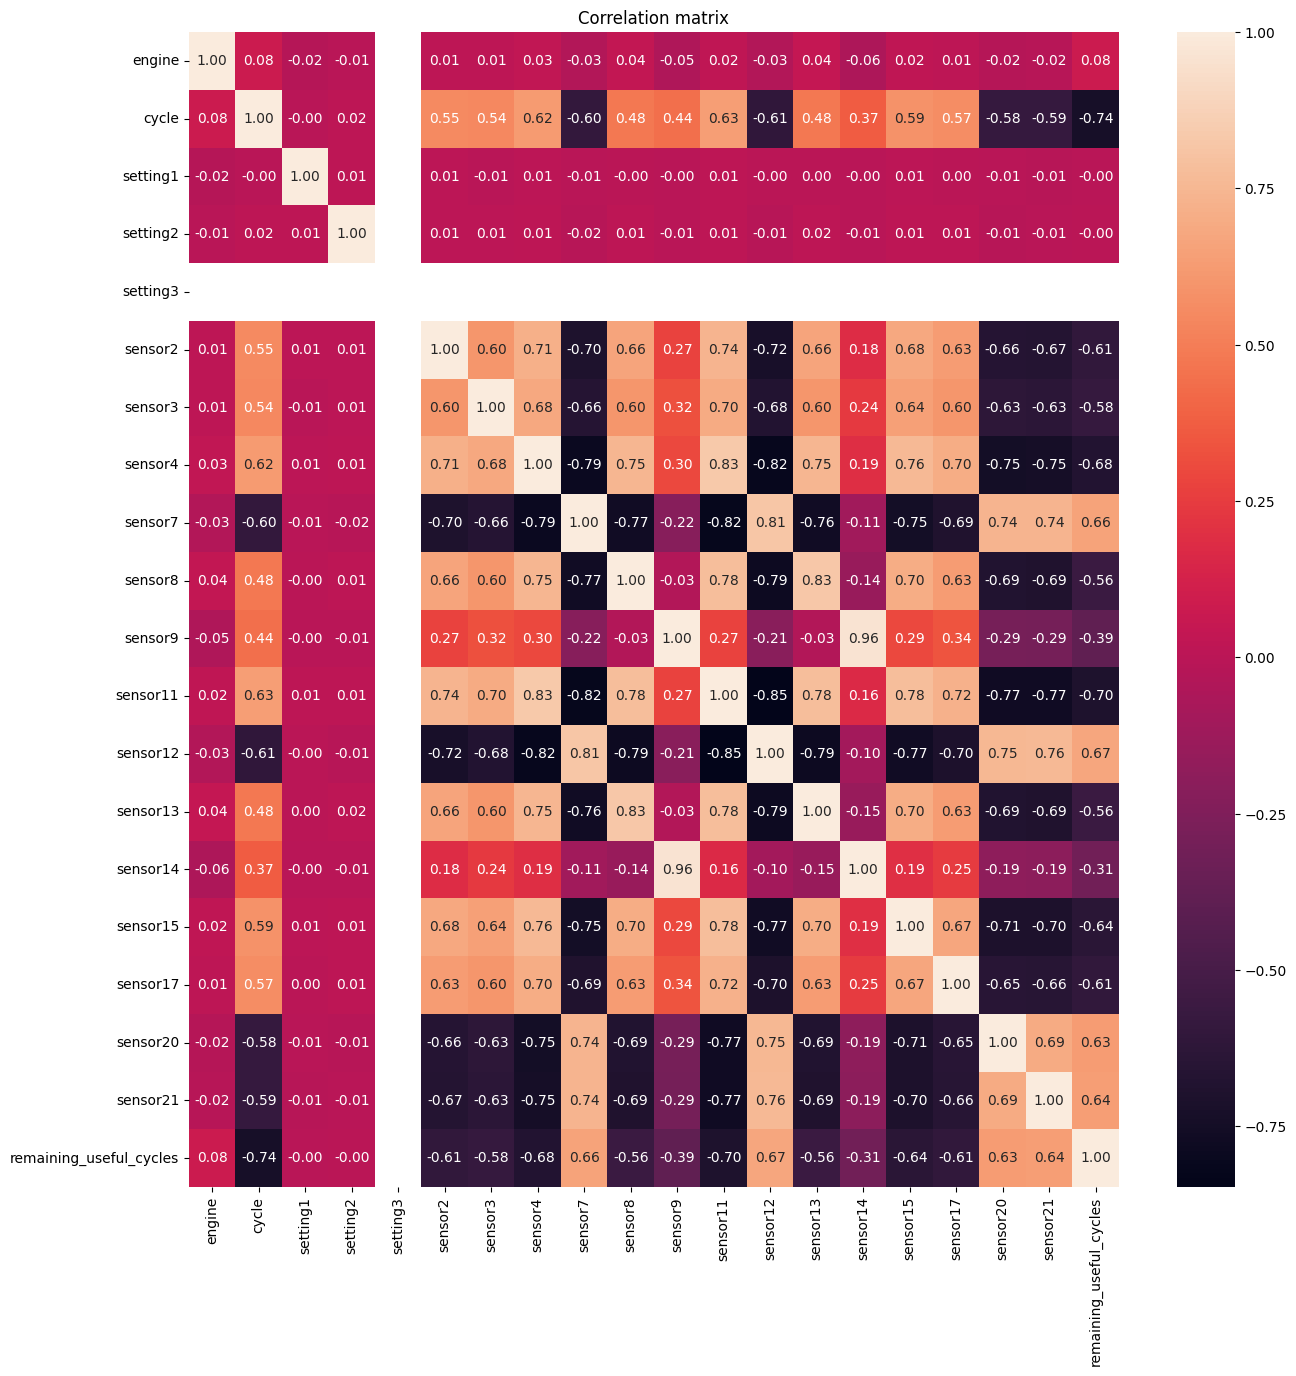

In [69]:
plt.figure(figsize = (15, 15))
sns.heatmap(new_data.corr(), annot = True, fmt = '.2f')
plt.title("Correlation matrix");

- Setting 3 has constant value (100), that's why it is NaN

In [70]:
new_data.drop(columns = ['setting3'], inplace = True)

- Plotting the correlation coefficient of each feature with the RUL

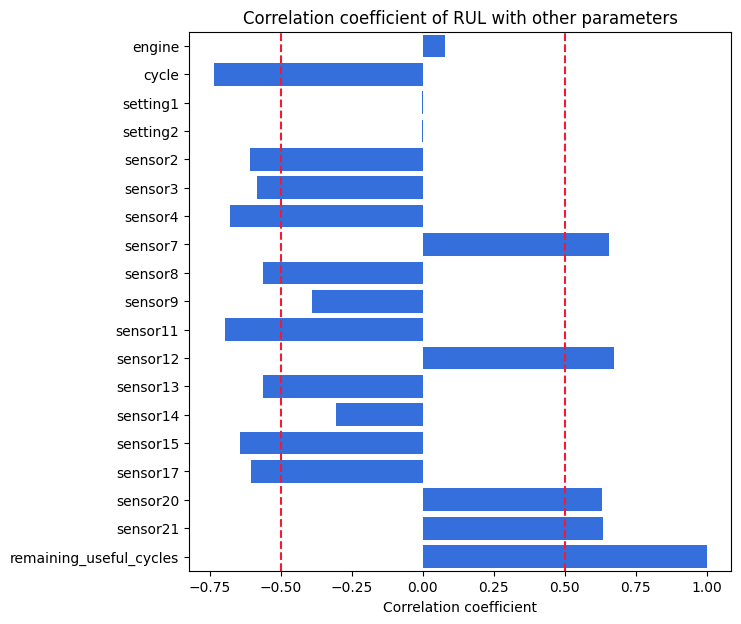

In [71]:
relevant_corr = new_data.corr()['remaining_useful_cycles'].dropna()
plt.figure(figsize = (7, 7))
sns.barplot(y = relevant_corr.index, x = relevant_corr.values, color = '#1967f7')
plt.axvline(x = 0.5, linestyle = "--", color = '#f71933')
plt.axvline(x = -0.5, linestyle = "--", color = '#f71933')
plt.xlabel("Correlation coefficient")
plt.title("Correlation coefficient of RUL with other parameters");

- Taking only those features, which has correlation coefficient -> 
    - more than `0.5` (positive linear relationship)
    - less than `-0.5` (negative linear relationship)

In [74]:
selected_columns = new_data.columns[np.abs(relevant_corr) > 0.5]
selected_columns = ["engine"] + list(selected_columns)
new_data = new_data[selected_columns]

In [75]:
new_data.head()

,engine,cycle,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,remaining_useful_cycles
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


- Also, the cycle is also irrelevant, as we can directly get the RUL based on it, so drop it

In [76]:
new_data.drop(columns = 'cycle', inplace = True)

In [77]:
new_data.shape

(20631, 14)

In [78]:
new_data.head()

,engine,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,remaining_useful_cycles
0,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


- Save the dataframe for further processing

In [79]:
new_data.to_csv('data.csv', index = False)